<a href="https://colab.research.google.com/github/WuilsonEstacio/github-para-estadistica/blob/main/Histogramas_y_Distribuciones_y_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogramas y Distribuciones

https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/

In [ ]:
# Graficos embebidos.
%matplotlib inline 

In [ ]:
import numpy as np # importando numpy
from scipy import stats # importando scipy.stats
import pandas as pd # importando pandas

In [ ]:
datos = np.random.randn(5, 4) # datos normalmente distribuidos
datos

array([[-1.80779692, -0.96154161,  2.54714877,  0.51233148],
       [ 2.03458216,  1.14993917, -0.25808062,  1.53572325],
       [-0.94631996,  0.40345333,  0.06156058,  0.04322098],
       [ 0.75057342,  0.74705493,  0.45713962, -2.19030812],
       [-2.21315008,  2.10113605, -0.70446501, -0.62128733]])

In [ ]:
# usando pandas
dataframe = pd.DataFrame(datos, index=['a', 'b', 'c', 'd', 'e'], 
                        columns=['col1', 'col2', 'col3', 'col4'])
dataframe

,col1,col2,col3,col4
a,-1.807797,-0.961542,2.547149,0.512331
b,2.034582,1.149939,-0.258081,1.535723
c,-0.946320,0.403453,0.061561,0.043221
d,0.750573,0.747055,0.457140,-2.190308
e,-2.213150,2.101136,-0.704465,-0.621287


# Distribución normal

In [ ]:
import matplotlib.pyplot as plt # importando matplotlib
import seaborn as sns # importando seaborn
import pylab

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [ ]:
mu, sigma = 0, 0.1 # media y desvio estandar
s = np.random.normal(mu, sigma, 1000) #creando muestra de datos

AttributeError: ignored

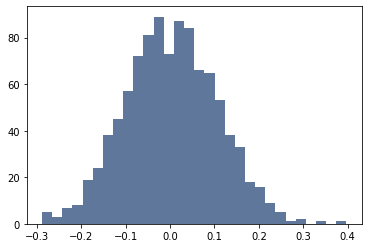

In [ ]:
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(s, 30, normed=True, facecolor='g', alpha=0.75)
normal = plt.plot(cajas, 1/(sigma * np.sqrt(2 * np.pi))*np.exp( - (cajas - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

Distribuciones simetricas y asimetricas

https://relopezbriega.github.io/blog/2015/06/27/probabilidad-y-estadistica-con-python/

Las distribuciones asimétricas suelen ser problemáticas, ya que la mayoría de los métodos estadísticos suelen estar desarrollados para distribuciones del tipo normal. Para salvar estos problemas se suelen realizar transformaciones a los datos para hacer a estas distribuciones más simétricas y acercarse a la distribución normal.

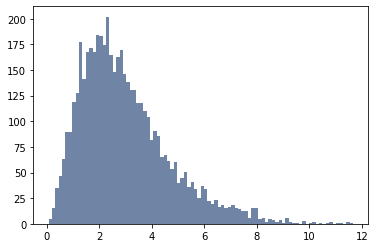

In [ ]:
# Dibujando la distribucion Gamma
x = stats.gamma(3).rvs(5000)
gamma = plt.hist(x, 90, histtype="stepfilled", alpha=.9) # alpha= da transparencia, 90 da los cuadros

En este ejemplo podemos ver que la distribución gamma que dibujamos tiene una asimetria positiva.

# Cuartiles y diagramas de cajas
Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

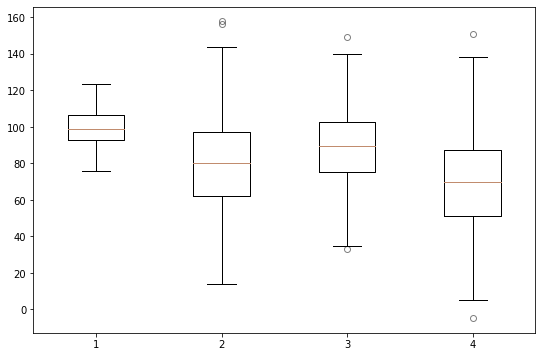

In [ ]:

# Ejemplo de grafico de cajas en python

datos_1 = np.random.normal(100, 10, 200)
datos_2 = np.random.normal(80, 30, 200)
datos_3 = np.random.normal(90, 20, 200)
datos_4 = np.random.normal(70, 25, 200)

datos_graf = [datos_1, datos_2, datos_3, datos_4]

# Creando el objeto figura
fig = plt.figure(1, figsize=(9, 6))

# Creando el subgrafico
ax = fig.add_subplot(111)

# creando el grafico de cajas
bp = ax.boxplot(datos_graf)

# visualizar mas facile los atípicos
for flier in bp['fliers']:
    flier.set(marker='o', color='red', alpha=0.5)
# los puntos aislados son valores atípicos

# Regresiones

 Las regresiones es una de las herramientas principales de la estadistica inferencial. El objetivo del análisis de regresión es describir la relación entre un conjunto de variables, llamadas variables dependientes, y otro conjunto de variables, llamadas variables independientes o explicativas. Más específicamente, el análisis de regresión ayuda a entender cómo el valor típico de la variable dependiente cambia cuando cualquiera de las variables independientes es cambiada, mientras que se mantienen las otras variables independientes fijas. El producto final del análisis de regresión es la estimación de una función de las variables independientes llamada la función de regresión. **La idea es que en base a esta función de regresión podamos hacer estimaciones sobre eventos futuros**.

La regresión lineal es una de las técnicas más simples y mayormente utilizadas en los análisis de regresiones. Hace suposiciones muy rígidas sobre la relación entre la variable dependiente y y variable independiente x. Asume que la relación va a tomar la forma:

**y=β0+β1∗x, y=ax+b**

Uno de los métodos más populares para realizar regresiones lineales es el de mínimos cuadrados ordinarios (OLS, por sus siglas en inglés), este método es el estimador más simple y común en la que los dos βs se eligen para minimizar el cuadrado de la distancia entre los valores estimados y los valores reales.

In [ ]:
# importanto la api de statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Creando un DataFrame de pandas.
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df.head() # longley dataset

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [ ]:
# utilizando la api de formula de statsmodels
est = smf.ols(formula='Employed ~ GNP', data=df).fit()
est.summary() # Employed se estima en base a GNP.

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Wed, 06 Jan 2021   Prob (F-statistic):           8.36e-12
Time:                        22:38:35   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Como podemos ver, el resumen que nos brinda statsmodels sobre nuestro modelo de regresión contiene bastante información sobre como se ajuste el modelo a los datos. Pasemos a explicar algunos de estos valores:

Dep. Variable: es la variable que estamos estimasdo.
Model: es el modelo que estamos utilizando.
R-squared: es el coeficiente de determinación, el cual mide cuan bien nuestra recta de regresion se aproxima a los datos reales.
Adj. R-squared: es el coeficiente anterior ajustado según el número de observaciones.
[95.0% Conf. Int.]: Los valores inferior y superior del intervalo de confianza del 95%.
coef: el valor estimado del coeficiente.
std err: el error estándar de la estimación del coeficiente.
Skew: una medida de la asimetria de los datos sobre la media.
Kurtosis: Una medida de la forma de la distribución. La curtosis compara la cantidad de datos cerca de la media con los que están más lejos de la media(en las colas).

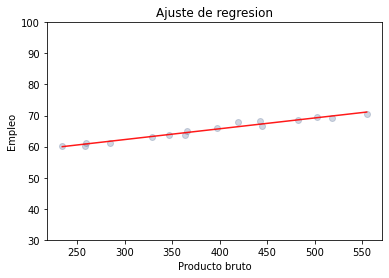

In [ ]:
# grafico de regresion. que tanto se ajusta el modelo a los datos.
y = df.Employed  # Respuesta
X = df.GNP  # Predictor
X = sm.add_constant(X) # agrega constante

X_1 = pd.DataFrame({'GNP': np.linspace(X.GNP.min(), X.GNP.max(), 100)})
X_1 = sm.add_constant(X_1) 

y_reg = est.predict(X_1) # estimacion

plt.scatter(X.GNP, y, alpha=0.3)  # grafica los puntos de datos
plt.ylim(30, 100)  # limite de eje y
plt.xlabel("Producto bruto") # leyenda eje x
plt.ylabel("Empleo") # leyenda eje y
plt.title("Ajuste de regresion") # titulo del grafico
reg = plt.plot(X_1.GNP, y_reg, 'r', alpha=0.9)  # linea de regresion

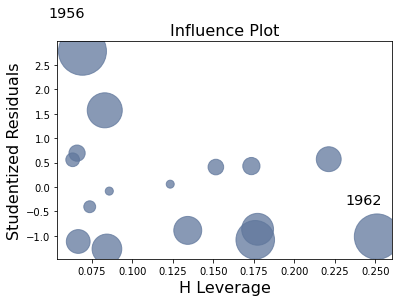

In [ ]:
# Este último gráfico nos muestra el apalancamiento y la influencia de cada caso
from statsmodels.graphics.regressionplots import influence_plot
inf =influence_plot(est)

# La estadística bayesiana

La estadística bayesiana es un subconjunto del campo de la estadística en la que la evidencia sobre el verdadero estado de las cosas se expresa en términos de grados de creencia. Esta filosofía de tratar a las creencias como probabilidad es algo natural para los seres humanos. Nosotros la utilizamos constantemente a medida que interactuamos con el mundo y sólo vemos verdades parciales; necesitando reunir pruebas para formar nuestras creencias.

La diferencia fundamental entre la estadística clásica (frecuentista) y la bayesiana es el concepto de probabilidad. Para la estadística clásica es un concepto objetivo, que se encuentra en la naturaleza, mientras que para la estadística bayesiana se encuentra en el observador, siendo así un concepto subjetivo. De este modo, en estadística clásica solo se toma como fuente de información las muestras obtenidas. En el caso bayesiano, sin embargo, además de la muestra también juega un papel fundamental la información previa o externa que se posee en relación a los fenómenos que se tratan de modelar.

La estadística bayesiana está demostrando su utilidad en ciertas estimaciones basadas en el conocimiento subjetivo a priori y el hecho de permitir revisar esas estimaciones en función de la evidencia empírica es lo que está abriendo nuevas formas de hacer conocimiento. Una aplicación de esto son los clasificadores bayesianos que son frecuentemente usados en implementaciones de filtros de correo basura, que se adaptan con el uso. La estadística bayesiana es un tema muy interesante que merece un artículo en sí mismo.

Para entender más fácilmente como funciona la estadística bayesiana veamos un simple ejemplo del lanzamiento de una moneda. La idea principal de la inferencia bayesiana es que la noción de probabilidad cambia mientras más datos tengamos.

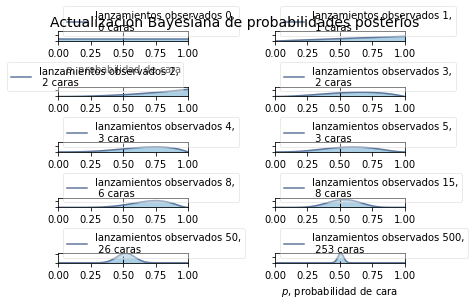

In [ ]:
sns.set_context(rc={"figure.figsize": (11, 8)})

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probabilidad de cara") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="lanzamientos observados %d,\n %d caras" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)

plt.suptitle("Actualizacion Bayesiana de probabilidades posterios",
             y=1.02,
             fontsize=14)

plt.tight_layout()

Como el gráfico de arriba muestra, cuando empezamos a observar nuevos datos nuestras probabilidades posteriores comienzan a cambiar y moverse. Eventualmente, a medida que observamos más y más datos (lanzamientos de monedas), nuestras probabilidades se acercan más y más hacia el verdadero valor de p = 0.5 (marcado por una línea discontinua).

Aquí termina este tutorial, espero que les haya sido util.

Saludos!

Este post fue escrito utilizando IPython notebook. Pueden descargar este notebook o ver su version estática en nbviewer.